# Graficos com python

Quem nunca sofreu para fazer gráficos para uma apresentação ou para um artigo? Neste notebook iremos criar exemplos de graficos usando a biblioteca Seaborn e a Matplotlib e vamos tentar entender de forma um pouco mais detalhada como estas bibliotecas funcionam. Com isso, espero que você consiga se sentir confiante ao usar estas ferramentas e independente para customizar e criar visualizações mais complexas.

## Setup

In [1]:
# Bibliotecas necessarias
import pandas as pd # Biblioteca para lidar com dataframes
import numpy as np # Biblioteca para processamento numerico
import matplotlib.pyplot as plt 
import seaborn as sns

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'  

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Data

Para este notebook iremos usar dois datasets de exemplo

In [2]:
# Load some sample data
medals = pd.read_csv('data/medals_by_country.csv', index_col=[0])
climate_change = pd.read_csv('data/climate_change.csv', parse_dates=['date'])

In [122]:
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


In [123]:
climate_change.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


## Formatando os dados

Parte do trabalho para criar graficos mais facilmente consiste em formatar os dados a serem plotados. Recomendo que se crie um dataframe especifico para plotar o grafico. Se possivel, o dataframe deveria conter uma coluna para a grandeza x, grandeza y. Neste notebook não iremos tratar as técnicas para processar os dados e formatá-los. 


| x     | y     |
|-------|-------|
| valor | valor |
| valor | valor |

## Graficos comuns
Iremos cobrir os principais gráficos utilizados nos artigos e apresentações. São eles:
- Histograma
- Grafico de linhas
- Grafico de barras
- Gráfico de caixa (Boxplot)
- Gráfico de espalhamento (Scatter plot)

### Histograma

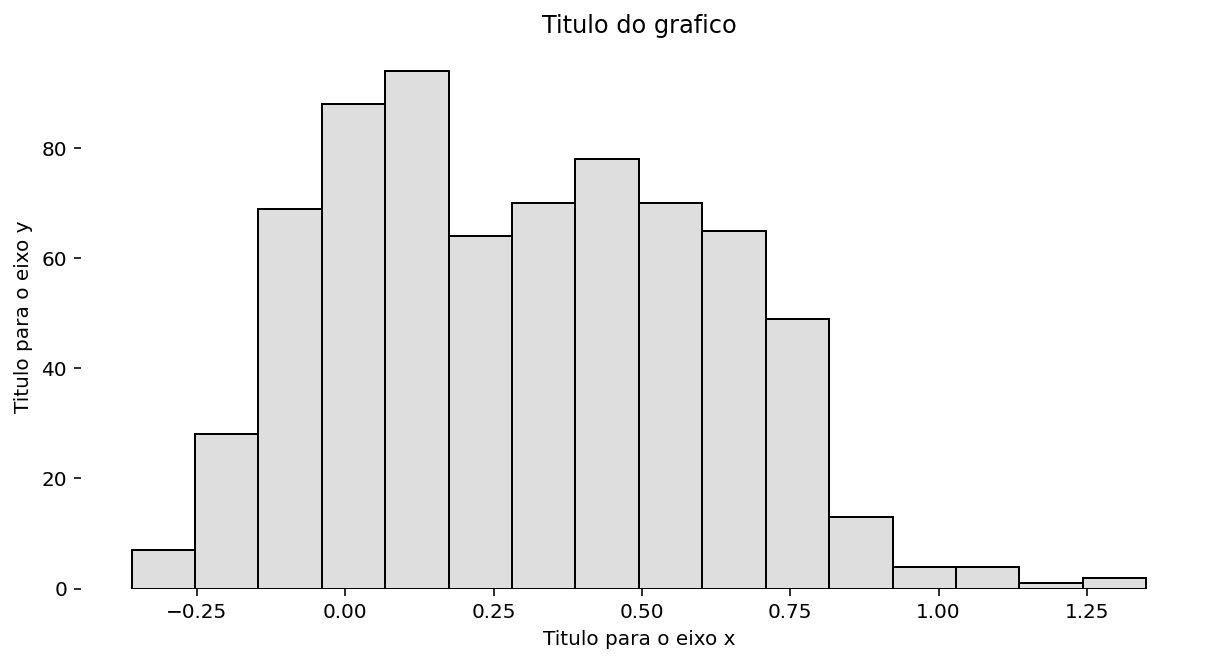

In [139]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(
        data=climate_change
        , x='relative_temp'
        , color=sns.color_palette(['lightgrey'])
        , ax=ax
)

_ = ax.set(
    ylabel = ('Titulo para o eixo y')
    , xlabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico')
)

# Remove as bordas do quadro
sns.despine(
    bottom=True
    , left=True
    , right=True
    , top=True)

### Boxplot

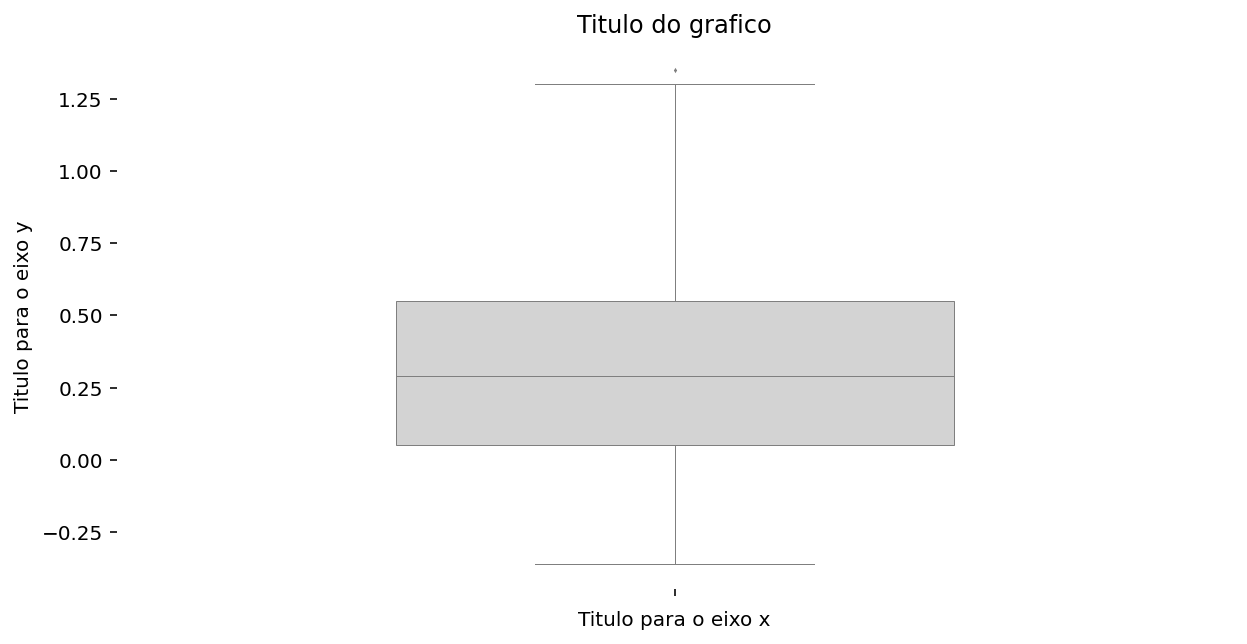

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.boxplot(
        data=climate_change
        , y='relative_temp'
        , fliersize=0.5
        , width = 0.5
        , linewidth=0.5
        , palette=sns.color_palette(['lightgrey'])
        , ax=ax
)

_ = g.set(
    ylabel = ('Titulo para o eixo y')
    , xlabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico')
)

# Remove as bordas do quadro
sns.despine(
    bottom=True
    , left=True
    , right=True
    , top=True)

## Grafico de linhas

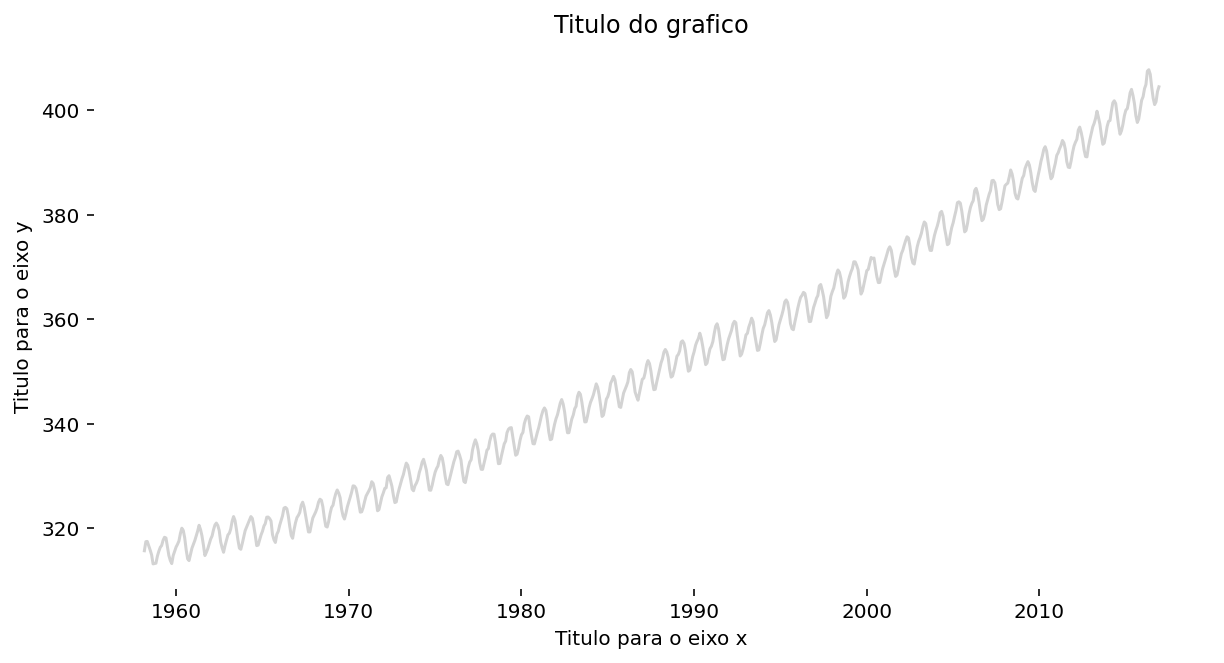

In [124]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.lineplot(
        data=climate_change
        , x='date'
        , y='co2'
        , color='lightgrey'
        , ax=ax
)

_ = g.set(
    ylabel = ('Titulo para o eixo y')
    , xlabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico')
)

# Remove as bordas do quadro
sns.despine(
    bottom=True
    , left=True
    , right=True
    , top=True)

## Grafico de espalhamento (Scatterplot)

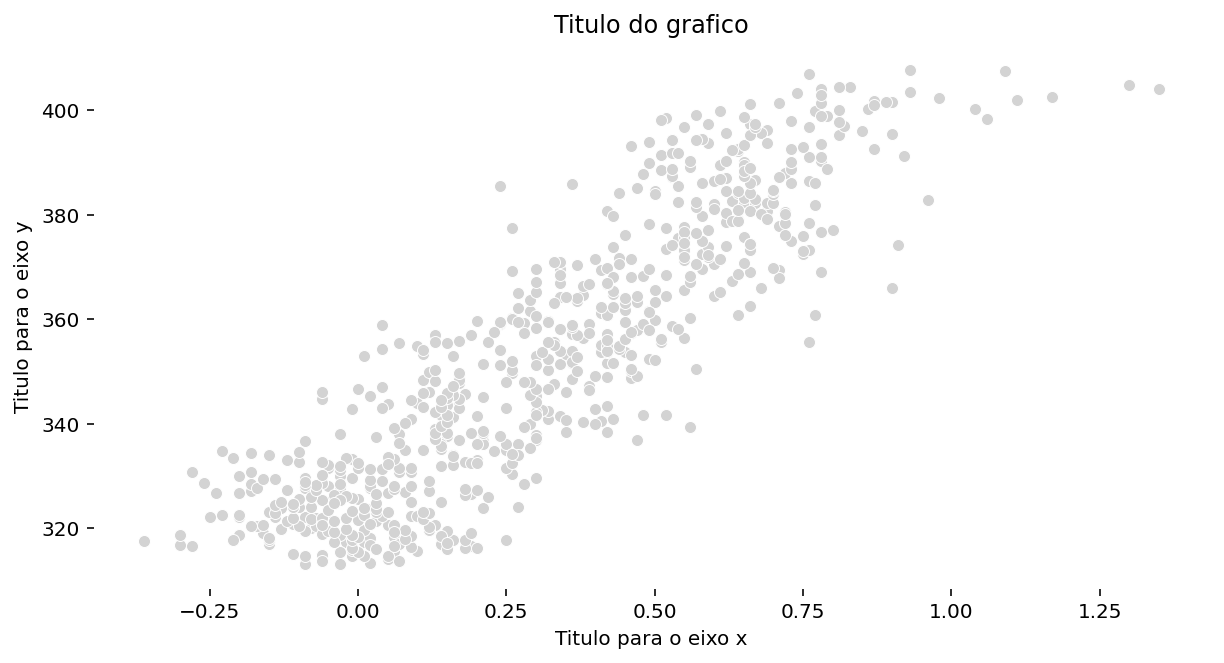

In [117]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.scatterplot(
        data=climate_change
        , x='relative_temp'
        , y='co2'
        , color='lightgrey'
        , ax=ax
)

_ = g.set(
    ylabel = ('Titulo para o eixo y')
    , xlabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico')
)

# Remove as bordas do quadro
sns.despine(
    bottom=True
    , left=True
    , right=True
    , top=True)

## Grafico de barras

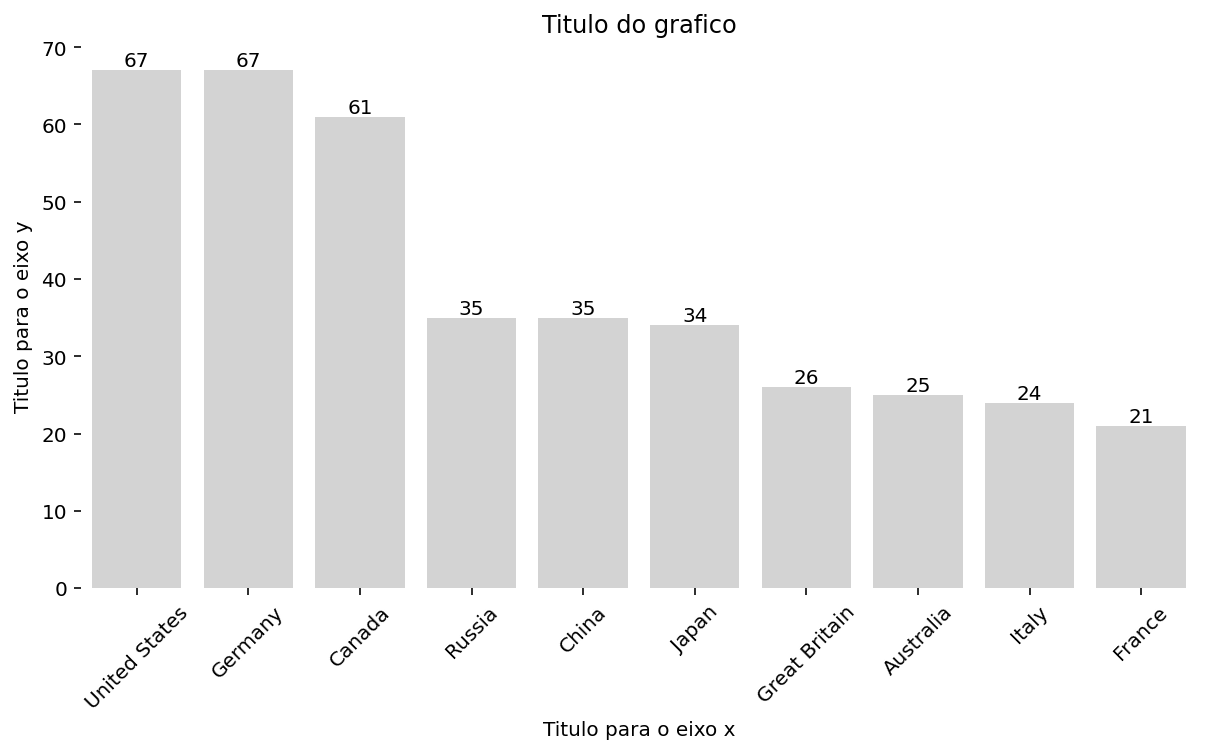

In [125]:
df_plot = medals.sort_values(by=['Bronze'], ascending=[False])\
                .copy()
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(
        data=df_plot
        , x=df_plot.index
        , y='Bronze'
        , color='lightgrey'
        , ax=ax
)

_ = g.set(
    ylabel = ('Titulo para o eixo y')
    , xlabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico')
)
for i in ax.containers:
    _ = ax.bar_label(i,)
ax.tick_params(axis='x', labelrotation = 45, labelbottom=True)

# Remove as bordas do quadro
sns.despine(
    bottom=True
    , left=True
    , right=True
    , top=True)

E se quisermos fazer um gráfico de barras para cada país e cada tipo de medalha? Primeiramente, iremos formatar os dados para termos 3 colunas: país, tipo de medalha e quantidade. Depois com alguns parâmetros adicionais podemos controlar a exibição dos novos valores. 

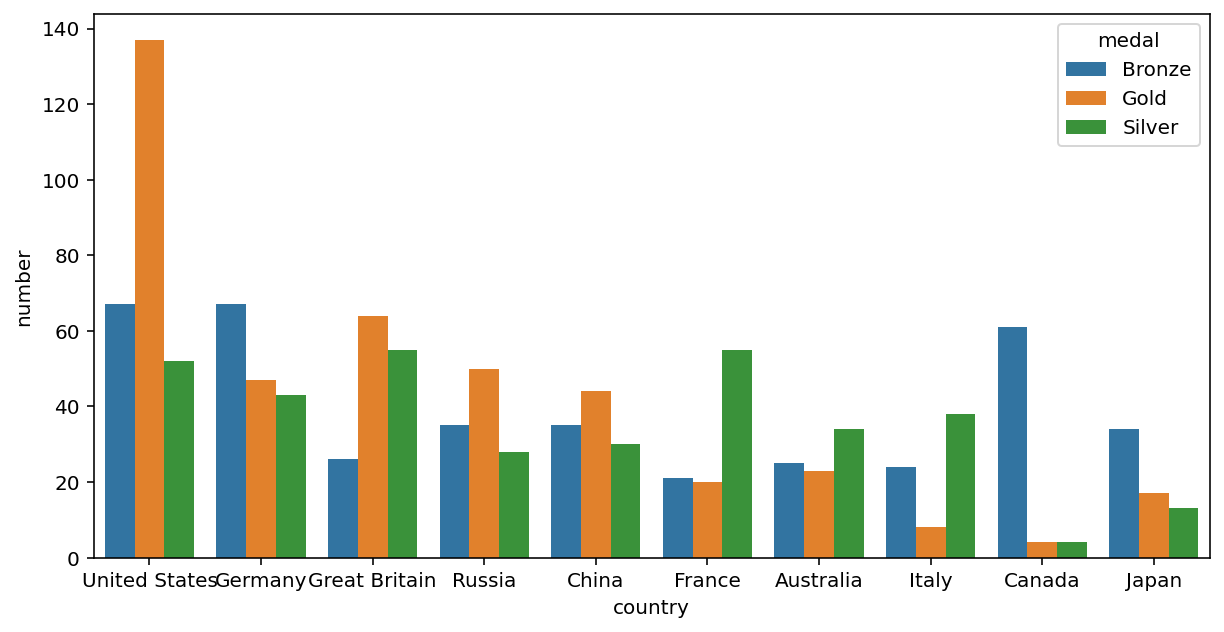

In [127]:
df_plot = medals.reset_index()\
                .rename(columns={'index': 'country'})\
                .melt(id_vars=['country']
                      , var_name='medal'
                      , value_name='number'
                     )
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(
        data=df_plot
        , x='country'
        , y='number'
        , hue='medal'
        , ax=ax
)

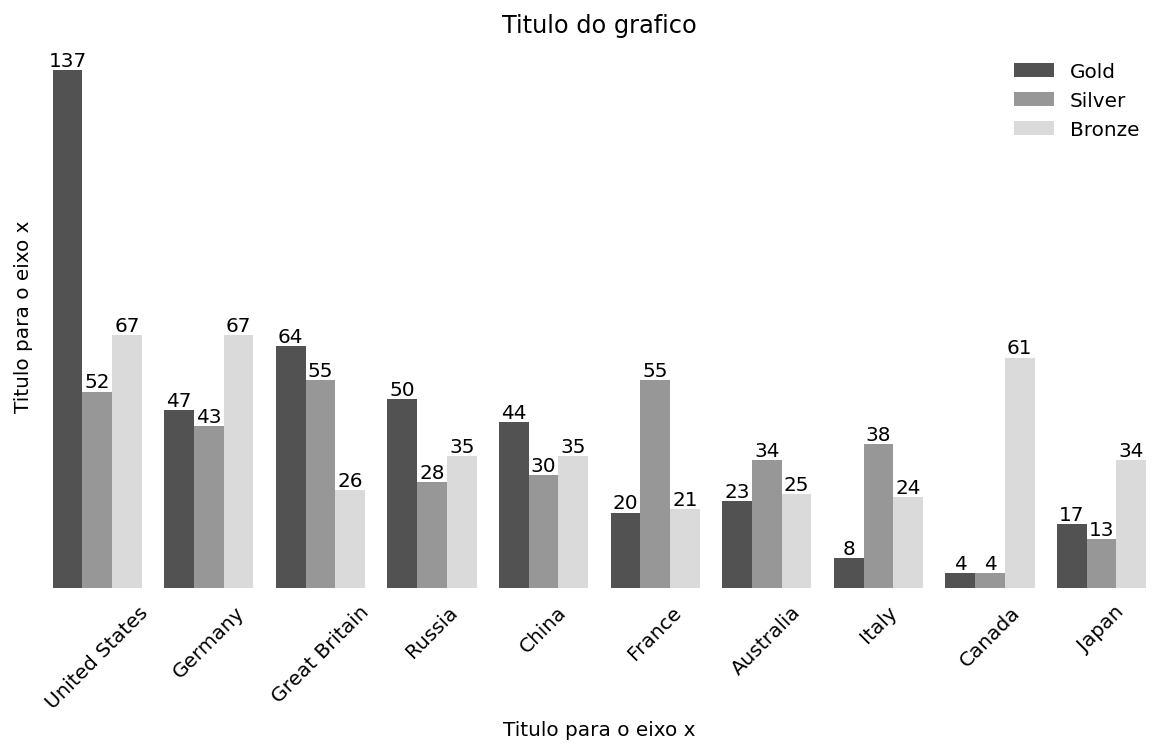

In [134]:
df_plot = medals.reset_index()\
                .rename(columns={'index': 'country'})\
                .melt(id_vars=['country']
                      , var_name='medal'
                      , value_name='number'
                     )
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(
        data=df_plot
        , x='country'
        , y='number'
        , hue='medal'
        , hue_order = ['Gold', 'Silver', 'Bronze']
        , palette=sns.color_palette('Greys_r'
                                    , n_colors=df_plot['medal'].nunique())
        , ax=ax
)

_ = g.set(
    xlabel = ('Titulo para o eixo x')
    , ylabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico')
)
# Codigo para exibir o numero correspondente de cada barra
for i in ax.containers:
    _ = ax.bar_label(i,)
    
# Rotaciona os nomes dos xticks
ax.tick_params(axis='x', labelrotation = 45)

# Remove os y ticks 
# ax.get_yaxis().set_visible(False)

# Remove os ticks
ax.tick_params(bottom = False, left=False)

# Remove os labels dos ticks
_ = ax.set_yticks([])

# Remove o quadro que contorna a legenda do grafico
_ = ax.legend(frameon=False)

# Remove a linha esquerda do frame
sns.despine(left = True, bottom=True)

In [140]:
df_plot.head()

,country,medal,number
0,United States,Bronze,67
1,Germany,Bronze,67
2,Great Britain,Bronze,26
3,Russia,Bronze,35
4,China,Bronze,35


## Multiplos graficos

Frequentemente temos que produzir gráficos em paralelo para otimizar espaço. A biblioteca nos permite criar diferentes tipos de gráficos lado a lado.

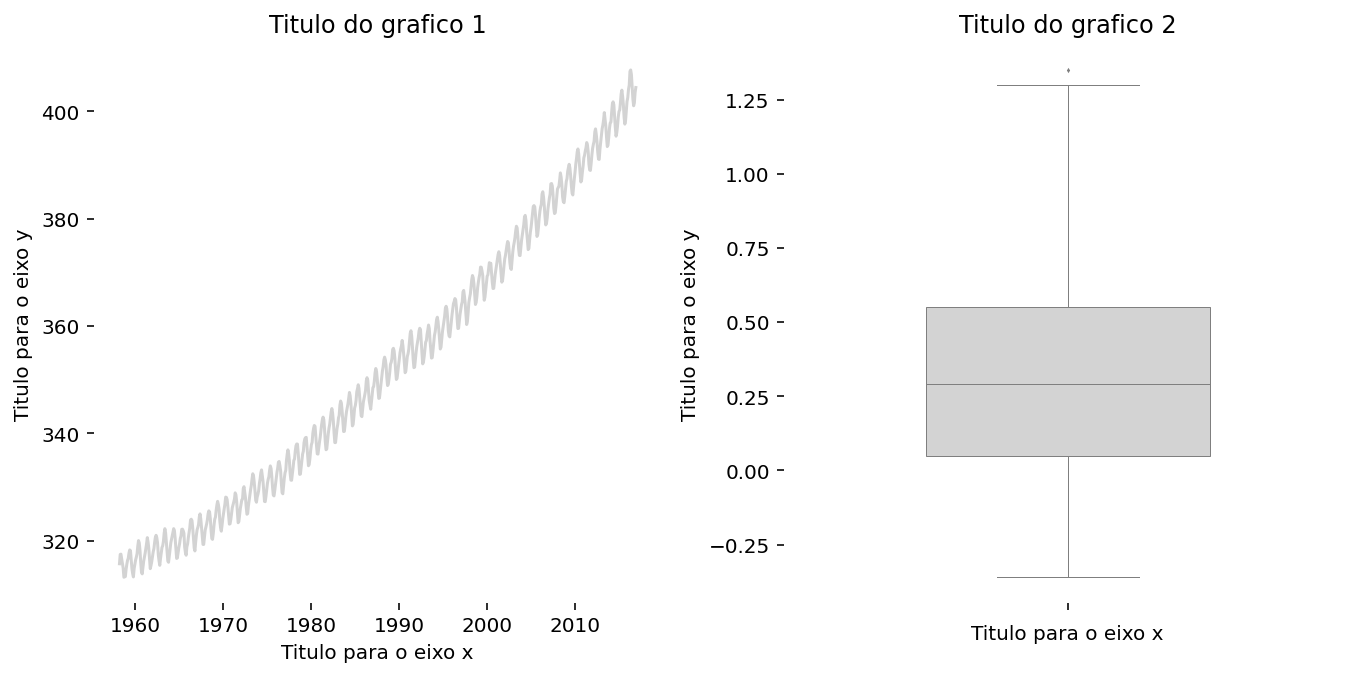

In [128]:
# Unpacking method
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout(pad=3)

# Grafico 1
sns.lineplot(
        data=climate_change
        , x='date'
        , y='co2'
        , color='lightgrey'
        , ax=ax1
)
ax1.set(
    ylabel = ('Titulo para o eixo y')
    , xlabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico 1')
)

# Grafico 2
sns.boxplot(
        data=climate_change
        , y='relative_temp'
        , fliersize=0.5
        , width = 0.5
        , linewidth=0.5
        , palette=sns.color_palette(['lightgrey'])
        , ax=ax2
)
ax2.set(
    ylabel = ('Titulo para o eixo y')
    , xlabel = ('Titulo para o eixo x')
    , title = ('Titulo do grafico 2')
)
# Remove as bordas do quadro
sns.despine(
    bottom=True
    , left=True
    , right=True
    , top=True)
fig.savefig(fname='nome_do_arquivo.png')
plt.show();

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

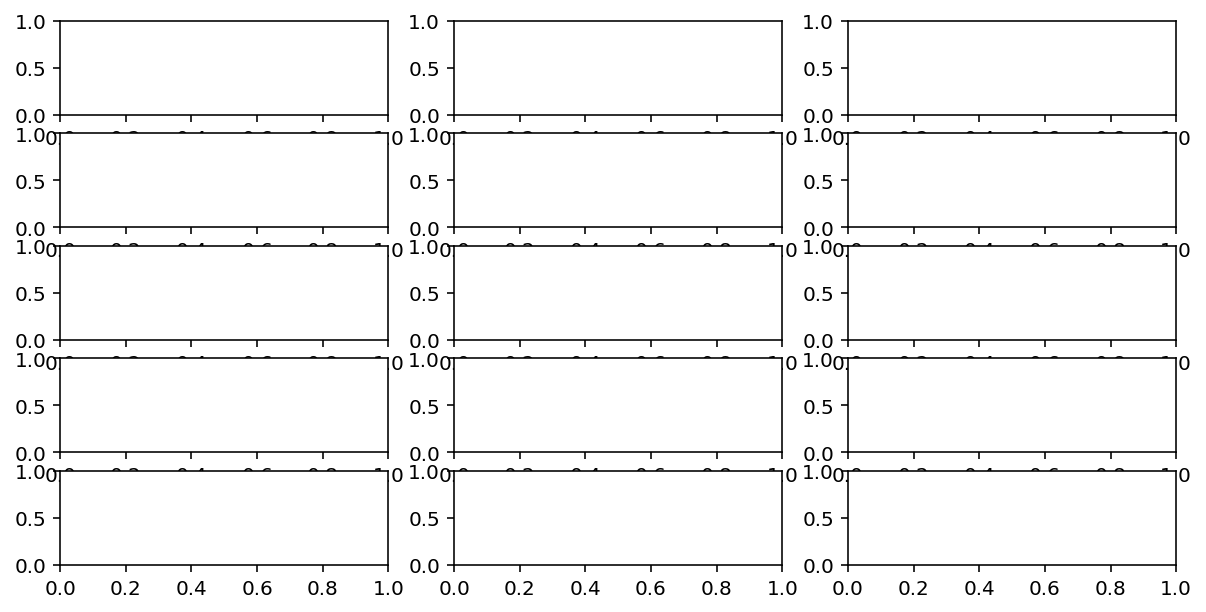

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(10, 5))
ax

## Boas práticas

Criar boas visualizações é um desafio e uma arte. Devemos sempre tentar manter os gráficos o mais simples que pudermos. Poucas variações de cores e gráficos enxutos são sempre mais fáceis de serem lidos. 

O livro Storytelling with data é tráz boas referências de como se produzir bons gráficos. 

Além disso, conforme temos mais informação para exibir, precisaremos de gráficos mais complexos (gráficos com eixos compostos). Nestes momentos é muito importante se consultar a documentação da biblioteca Seaborn e ler a definição de cada um dos parâmetros do gráfico plotado.

## Referencias

[Cores no matplotlib](https://xkcd.com/color/rgb/)